# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.pathway import Pathway
from utils.reporting import GlobalReport
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel
from utils.thrombolysis_outcome_model import OutcomeModel

## Create data for models

See 'data' folder for processing of raw data.

In [2]:
data_processor = DataProcess(
    year_min=2016,
    year_max=2021,
    limit_to_ambo=True,
)

data_processor.run()

All rows: 283285, ML rows:119897, Fraction: 0.42


## Model Run

In [3]:
run_model = True

if run_model:
    # Descriptive statistics
    ds = DescriptiveStatistics()
    #ds.run()
    
    # Thrombolysis decision model
    thrombolysis_choice_model = ThrombolysisChoiceModel()
    #thrombolysis_choice_model.run()

    # Outcome model
    outcome_model = OutcomeModel()
    outcome_model.run()

    # Pathway simulation
    
    """
    pathway = Pathway(
        data_processor.pathway_simulation_parameters,
        thrombolysis_choice_model.benchmark_thrombolysis,
        trials=100)
    pathway.run()
    """

Outcome multiclass ROC AUC 0.777


In [4]:
outcome_model.all_patients_outcomes_untreated_weighted_mrs.mean()

2.8155751777166373

In [5]:
outcome_model.all_patients_outcomes_treated_weighted_mrs.mean()


2.6854073017632065

In [6]:
outcome_model.all_patients_outcomes_improved.mean()

0.5232169288964421

(array([  17.,   21.,   41.,   38.,   36.,   44.,   55.,   42.,   69.,
          68.,   77.,  122.,  115.,  154.,  197.,  203.,  259.,  295.,
         371.,  444.,  477.,  607.,  630.,  754.,  912., 1026., 1099.,
        1190., 1235., 1187., 1003.,  852.,  688.,  600.,  495.,  417.,
         338.,  301.,  233.,  214.,  179.,  154.,  110.,  115.,  100.,
          67.,   67.,   58.,   49.,   36.,   26.,   34.,   29.,   17.,
          13.,   17.,   10.,    6.,    6.,    9.]),
 array([-1.50000000e+00, -1.45000000e+00, -1.40000000e+00, -1.35000000e+00,
        -1.30000000e+00, -1.25000000e+00, -1.20000000e+00, -1.15000000e+00,
        -1.10000000e+00, -1.05000000e+00, -1.00000000e+00, -9.50000000e-01,
        -9.00000000e-01, -8.50000000e-01, -8.00000000e-01, -7.50000000e-01,
        -7.00000000e-01, -6.50000000e-01, -6.00000000e-01, -5.50000000e-01,
        -5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
        -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.5000

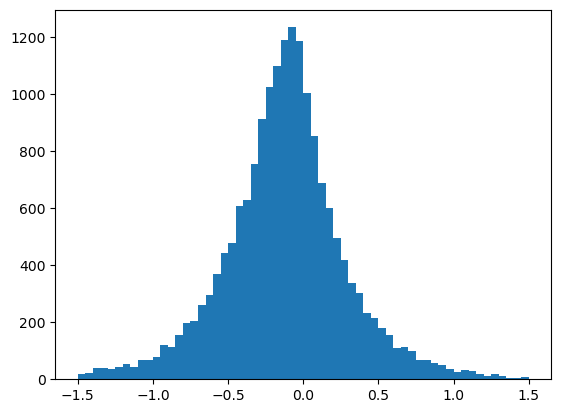

In [7]:
diff = outcome_model.all_patients_outcomes_treated_weighted_mrs - outcome_model.all_patients_outcomes_untreated_weighted_mrs
# Plot histogram of difference in mRS
plt.hist(diff, bins=np.arange(-1.5,1.51,0.05))

In [8]:
outcome_model.all_patients_outcomes_treated[:, 0:5].sum(axis=1)

array([0.17784525, 0.8241513 , 0.9819058 , ..., 0.8968205 , 0.8047805 ,
       0.79305667], dtype=float32)

In [9]:
outcome_model.all_patients_outcomes_treated[:, 0:5]

array([[1.19976304e-03, 3.24317312e-04, 1.81851734e-03, 4.36516386e-03,
        1.70137495e-01],
       [1.61775376e-03, 3.65692258e-01, 1.22955739e-01, 2.30466589e-01,
        1.03418976e-01],
       [3.74347240e-01, 3.53010088e-01, 9.48814005e-02, 1.43909186e-01,
        1.57579239e-02],
       ...,
       [3.05220075e-02, 1.05151288e-01, 1.94372684e-01, 4.75624859e-01,
        9.11496356e-02],
       [2.76738475e-03, 7.65012670e-03, 5.25891595e-02, 5.21845579e-01,
        2.19928294e-01],
       [2.20204121e-03, 6.00540685e-03, 8.52037035e-03, 3.53372574e-01,
        4.22956288e-01]], dtype=float32)

## Reporting

In [10]:
report = GlobalReport()
report.create_report()